In [1]:
%matplotlib inline

import os, sys
import numpy as np
import datetime as dt
from dateutil.relativedelta import relativedelta

from netCDF4 import Dataset
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point

sys.path.append("../pycommon")
from pps_tools import set_cartopy_gridlines, set_cartopy_colorbar


 

In [2]:
%ls nudging_utils

OISSS_L4_multimission_global_monthly_v1.0_2014-01.nc
OISSS_L4_multimission_global_monthly_v1.0_2014-01.nc.html
OISSS_L4_multimission_global_monthly_v1.0_2021-02.nc
SMAP_L2B_SSS_36950_20220101T005200_R18240_V5.0.h5
SMAP_L3_SSS_20220105_8DAYS_V5.0.nc
WOA05_pottemp_salt.nc
flood_salt_restore_PHC2.1440x1080.v20180405.nc
iced_ocean_topog2.nc
ocean_static.nc
ocean_topog.nc
woa18_decav_s01_04.nc
woa18_decav_s02_04.nc


In [3]:
# read in the output grid & the land/ocean mask

fn_grd_out = 'nudging_utils/flood_salt_restore_PHC2.1440x1080.v20180405.nc'
f = Dataset(fn_grd_out)
lat2d_grd_out = f.variables['lat'][:]
lon2d_grd_out = f.variables['lon'][:]
sss_grd_out = f.variables['SALT'][:]
f.close()


fn_mask = 'nudging_utils/ocean_topog.nc'
f = Dataset(fn_mask)
wet_grd_out = f.variables['wet'][:]
f.close()


print("lat2d_grd_out: shape, min, max=",lat2d_grd_out.shape, np.min(lat2d_grd_out), np.max(lat2d_grd_out))
print("lon2d_grd_out: shape, min, max=",lon2d_grd_out.shape, np.min(lon2d_grd_out), np.max(lon2d_grd_out))
print("sss: shape, min, max=",sss_grd_out.shape, np.min(sss_grd_out), np.max(sss_grd_out))
print("wet: shape, min, max=",wet_grd_out.shape, np.min(wet_grd_out), np.max(wet_grd_out))




lat2d_grd_out: shape, min, max= (1080, 1440) -81.60305 89.93877
lon2d_grd_out: shape, min, max= (1080, 1440) -299.99948 60.03369
sss: shape, min, max= (12, 1080, 1440) 3.297 41.3968
wet: shape, min, max= (1080, 1440) 0.0 1.0


Text(0.5, 1.0, 'SSS (unit: psu)')

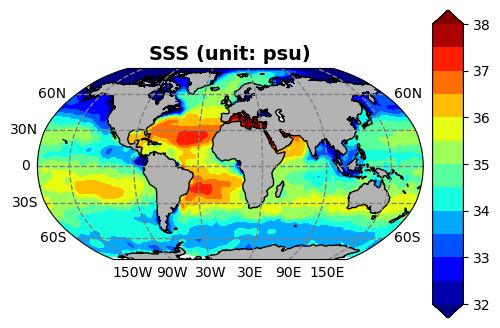

In [4]:
# plot the output SSS fields with land masked out

fig  = plt.figure(figsize=(6,4))

ax   = fig.add_subplot(111,projection=ccrs.Robinson())
crs = ccrs.PlateCarree()

sss_1mon = sss_grd_out[0,:,:]
sss_1mon[wet_grd_out<1] = np.nan
    

surf = ax.contourf(lon2d_grd_out, lat2d_grd_out, sss_1mon, levels=np.arange(32,38.5,0.5), extend="both", cmap=plt.cm.jet, transform=crs)
#surf = ax.contourf(lon2d, lat2d, sss[:,:], extend="both", cmap=plt.cm.jet, transform=crs)
set_cartopy_colorbar(ax,surf,fig,shrink=1)

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, facecolor=[0.7,0.7,0.7])
set_cartopy_gridlines(ax=ax,crs=crs)

ax.set_title('SSS (unit: psu)',fontsize=14,fontweight='heavy')


In [5]:
# Read in the input WOA SSS fields

#fn_grd_in = 'nudging_utils/OISSS_L4_multimission_global_monthly_v1.0_2014-01.nc'
fn_grd_in = 'nudging_utils/woa18_decav_s01_04.nc'
f = Dataset(fn_grd_in)
lat1d_grd_in = f.variables['lat'][:]
lon1d_grd_in = f.variables['lon'][:]
sss_grd_in = np.squeeze(f.variables['s_an'][:])[0,:,:]
time_grd_in = f.variables['time'][:]
depth_grd_in = f.variables['depth'][:]

f.close()

lon2d_grd_in, lat2d_grd_in = np.meshgrid(lon1d_grd_in, lat1d_grd_in)

print("lat2d_grd_in: shape, min, max=",lat2d_grd_in.shape, np.min(lat2d_grd_in), np.max(lat2d_grd_in))
print("lon2d_grd_in: shape, min, max=",lon2d_grd_in.shape, np.min(lon2d_grd_in), np.max(lon2d_grd_in))
print("sss_grd_in: shape, min, max=",sss_grd_in.shape, np.min(sss_grd_in), np.max(sss_grd_in))
print("depth:", depth_grd_in)
print("time:", time_grd_in.shape, type(time_grd_in[0]))
sdate = dt.datetime(1955,1,1,0,0,0)
obsdate = sdate + relativedelta(months=+int(time_grd_in[0]))
print("sdate=",sdate, "obsdate=",obsdate)



lat2d_grd_in: shape, min, max= (720, 1440) -89.875 89.875
lon2d_grd_in: shape, min, max= (720, 1440) -179.875 179.875
sss_grd_in: shape, min, max= (720, 1440) 3.7535899 40.889988
depth: [   0.    5.   10.   15.   20.   25.   30.   35.   40.   45.   50.   55.
   60.   65.   70.   75.   80.   85.   90.   95.  100.  125.  150.  175.
  200.  225.  250.  275.  300.  325.  350.  375.  400.  425.  450.  475.
  500.  550.  600.  650.  700.  750.  800.  850.  900.  950. 1000. 1050.
 1100. 1150. 1200. 1250. 1300. 1350. 1400. 1450. 1500.]
time: (1,) <class 'numpy.float32'>
sdate= 1955-01-01 00:00:00 obsdate= 1986-01-01 00:00:00


Text(0.5, 1.0, 'WOA SSS (unit: psu)')

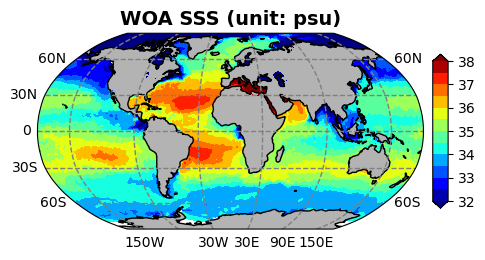

In [6]:
# Plot the input WOA18 fields

fig2  = plt.figure(figsize=(6,4))
ax2 = fig2.add_subplot(111,projection=ccrs.Robinson())
crs=ccrs.PlateCarree()

surf2 = ax2.contourf(lon2d_grd_in, lat2d_grd_in, sss_grd_in, levels=np.arange(32,38.5,0.5), extend="both", cmap=plt.cm.jet, transform=crs)

set_cartopy_colorbar(ax2,surf2,fig2,shrink=0.5)

ax2.add_feature(cfeature.COASTLINE)
ax2.add_feature(cfeature.LAND, facecolor=[0.7,0.7,0.7])
set_cartopy_gridlines(ax=ax2,crs=crs)

ax2.set_title('WOA SSS (unit: psu)',fontsize=14,fontweight='heavy')

In [7]:
type(sss_grd_in[0,0])
sss_grd_in[0,0]

masked

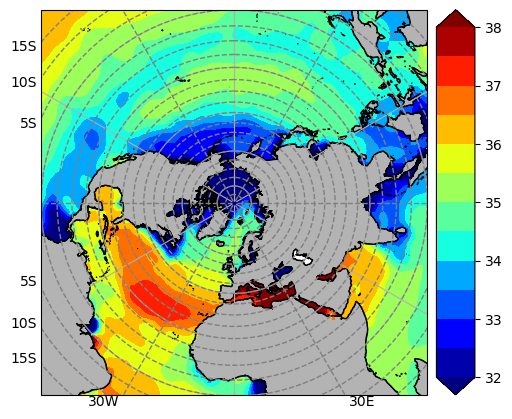

In [8]:
# show SSS of the original relaxation file in the polar region
fig6 = plt.figure(figsize=(6, 5))
ax6 = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=0))
ax6.coastlines(linewidth=0.75, color='black', resolution='50m')
ax6.gridlines(crs=ccrs.PlateCarree(), linestyle='-')
ax6.set_extent([-180, 180, 0, 90], crs=ccrs.PlateCarree())
crs = ccrs.PlateCarree()

surf6 = ax6.contourf(lon2d_grd_out, lat2d_grd_out, sss_1mon, levels=np.arange(32,38.5,0.5), extend="both", cmap=plt.cm.jet, transform=crs)
#surf = ax.contourf(lon2d, lat2d, sss[:,:], extend="both", cmap=plt.cm.jet, transform=crs)
set_cartopy_colorbar(ax6,surf6,fig6,shrink=1)

ax6.add_feature(cfeature.COASTLINE)
ax6.add_feature(cfeature.LAND, facecolor=[0.7,0.7,0.7])
set_cartopy_gridlines(ax=ax6,crs=crs,ytick=np.arange(-90,90+10,5))






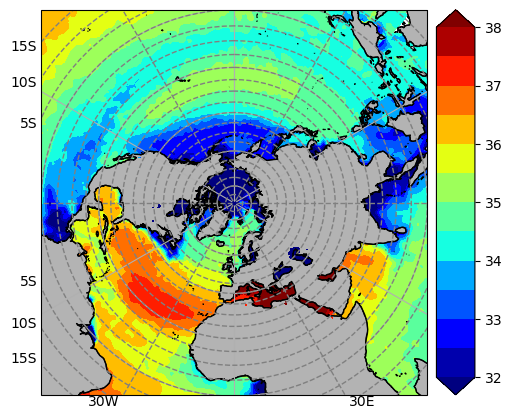

In [9]:
# show WOA SSS in the polar region
fig7 = plt.figure(figsize=(6, 5))
ax7 = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=0))
crs = ccrs.PlateCarree()

ax7.coastlines(linewidth=0.75, color='black', resolution='50m')
ax7.gridlines(crs=crs, linestyle='-')
ax7.set_extent([-180, 180, 0, 90], crs=crs)

surf7 = ax7.contourf(lon2d_grd_in, lat2d_grd_in, sss_grd_in, levels=np.arange(32,38.5,0.5), extend="both", cmap=plt.cm.jet, transform=crs)
set_cartopy_colorbar(ax7,surf7,fig7,shrink=1)

ax7.add_feature(cfeature.COASTLINE)
ax7.add_feature(cfeature.LAND, facecolor=[0.7,0.7,0.7])
set_cartopy_gridlines(ax=ax7,crs=crs,ytick=np.arange(-90,90+10,5))


In [10]:
# start to regrid SSS using xesmf

import xesmf as xe
grd_in = {"lon": lon1d_grd_in, "lat": lat1d_grd_in}
grd_out = {"lon": lon2d_grd_out, "lat": lat2d_grd_out}

inputRegridder = False
fnRegridder = "bilinear_720x1440_1080x1440.nc"
if inputRegridder: # directly read interpolation weights from the file
    regridder = xe.Regridder(grd_in, grd_out, "bilinear", weights=fnRegridder,periodic=True)
else: # generate interpolation weights online
    regridder = xe.Regridder(grd_in, grd_out, "bilinear",periodic=True)

In [11]:
regridder

xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_720x1440_1080x1440_peri.nc 
Reuse pre-computed weights? False 
Input grid shape:           (720, 1440) 
Output grid shape:          (1080, 1440) 
Periodic in longitude?      True

In [12]:
# generate regridder in NetCDF
outputRegridder=True
if outputRegridder:
    regridder.to_netcdf()

In [13]:
#print(sss_grd_in[0,0])
cp = sss_grd_in.copy()

#print(cp[1,0])
cp[cp.mask] = np.nan
cp.mask = False
#print(cp[1,0])
cp.fill_value = 0

In [14]:
remapped_grd_out = regridder(cp)
remapped_grd_out.shape


(1080, 1440)

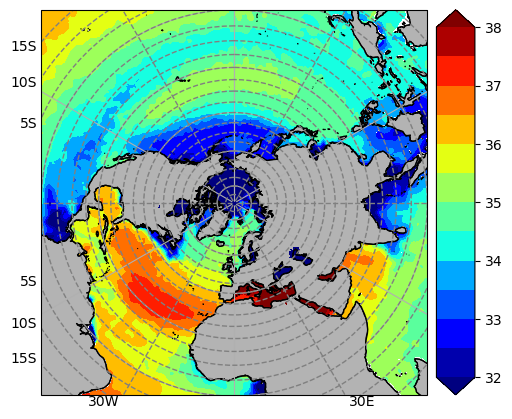

In [15]:
# show remapped tripolar grids in the polar region
fig8 = plt.figure(figsize=(6, 5))
ax8 = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=0))
crs = ccrs.PlateCarree()

ax8.coastlines(linewidth=0.75, color='black', resolution='50m')
ax8.gridlines(crs=crs, linestyle='-')
ax8.set_extent([-180, 180, 0, 90], crs=crs)

surf8 = ax8.contourf(lon2d_grd_out, lat2d_grd_out, remapped_grd_out, levels=np.arange(32,38.5,0.5), extend="both", cmap=plt.cm.jet, transform=crs)
set_cartopy_colorbar(ax8,surf8,fig8,shrink=1)

ax8.add_feature(cfeature.COASTLINE)
ax8.add_feature(cfeature.LAND, facecolor=[0.7,0.7,0.7])
set_cartopy_gridlines(ax=ax8,crs=crs,ytick=np.arange(-90,90+10,5))


Text(0.5, 1.0, 'remapped WOA SSS onto tripolar grids')

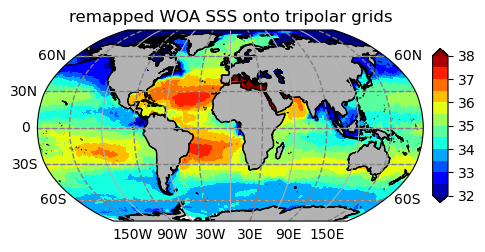

In [16]:
# show tripolar grids in the polar region
fig9 = plt.figure(figsize=(6, 4))
ax9 = plt.axes(projection=ccrs.Robinson())
crs = ccrs.PlateCarree()

ax9.coastlines(linewidth=0.75, color='black', resolution='50m')
ax9.gridlines(crs=crs, linestyle='-')
#ax9.set_extent([-180, 180, -90, 90], crs=crs)

surf9 = ax9.contourf(lon2d_grd_out, lat2d_grd_out, remapped_grd_out, levels=np.arange(32,38.5,0.5), extend="both", cmap=plt.cm.jet, transform=crs)
set_cartopy_colorbar(ax9,surf9,fig9,shrink=0.5)

ax9.add_feature(cfeature.COASTLINE)
ax9.add_feature(cfeature.LAND, facecolor=[0.7,0.7,0.7])
set_cartopy_gridlines(ax=ax9,crs=crs,ytick=np.arange(-90,90+10,30))
ax9.set_title("remapped WOA SSS onto tripolar grids")

In [17]:
# How to fill the missing data in L4
# 1. Temporal interpolation the monthly dataset before and after (sss_t = 0.5*(sss_{t-1} + sss_{t+1})
# 2. Reuse the interpolation grids 